In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-01-14 15:49:43.831838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 1.6480 - accuracy: 0.2500
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 1s 116ms/step - loss: 1.6718 - accuracy: 0.2305 - val_loss: 1.7135 - val_accuracy: 0.1414
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5993 - accuracy: 0.2812
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 0s 19ms/step - loss: 1.6404 - accuracy: 0.2678 - val_loss: 1.6865 - val_accuracy: 0.1414
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6644 - accuracy: 0.2500
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 0s 19ms/step - loss: 1.6702 - accuracy: 0.2610 - val_loss: 1.6612 - val_accuracy: 0.1717
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5212 - accuracy: 0.3594
Epoch 4: sa

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 0s 17ms/step - loss: 1.5573 - accuracy: 0.3051 - val_loss: 1.5941 - val_accuracy: 0.2525
Epoch 7/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5151 - accuracy: 0.3594
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 0s 17ms/step - loss: 1.5221 - accuracy: 0.3729 - val_loss: 1.5742 - val_accuracy: 0.2626
Epoch 8/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5380 - accuracy: 0.3359
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [==============================] - 0s 18ms/step - loss: 1.5251 - accuracy: 0.3797 - val_loss: 1.5543 - val_accuracy: 0.2626
Epoch 9/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4837 - accuracy: 0.3750
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
3/3 [========================

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 18ms/step - loss: 0.2379 - accuracy: 0.9293


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 71ms/step
[8.576655e-01 7.501748e-04 6.598605e-02 9.713165e-03 6.588521e-02]
0


# 混同行列

4/4 [==============================] - 0s 1ms/step


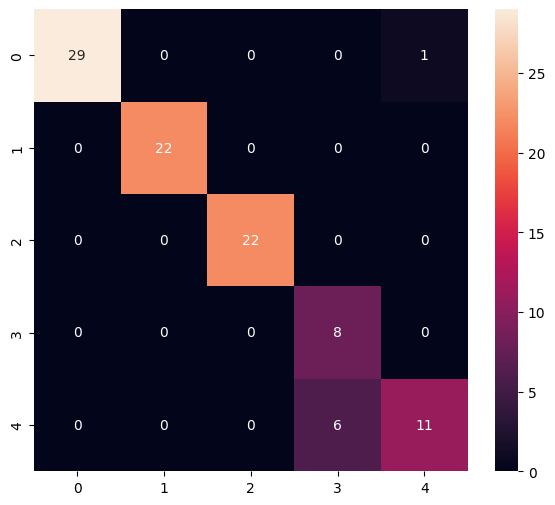

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        22
           3       0.57      1.00      0.73         8
           4       0.92      0.65      0.76        17

    accuracy                           0.93        99
   macro avg       0.90      0.92      0.89        99
weighted avg       0.95      0.93      0.93        99



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp2sis6ook/assets


INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp2sis6ook/assets
2024-01-14 15:50:05.846277: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-14 15:50:05.846587: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-14 15:50:05.847683: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp2sis6ook
2024-01-14 15:50:05.849128: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-14 15:50:05.849140: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp2sis6ook
2024-01-14 15:50:05.852545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2024-01-14 15:50:05.853408: I tensorflow/cc/saved_model/load

6588

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.33 ms, sys: 1.92 ms, total: 3.25 ms
Wall time: 2.82 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.5766548e-01 7.5017405e-04 6.5986052e-02 9.7131655e-03 6.5885201e-02]
0
